In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size']=14
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)

In [2]:
df = pd.read_csv(r"D:\Data Analysis\EDA Indian Food\Dataset\indian_food.csv")
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [13]:
df.state.value_counts()

state
Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Haryana             1
Name: count, dtype: int64

In [16]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [17]:
df.drop(df[df.region.isnull()].index, inplace=True)

In [18]:
df.diet.value_counts()

diet
vegetarian        225
non vegetarian     29
Name: count, dtype: int64

In [20]:
df.shape

(254, 9)

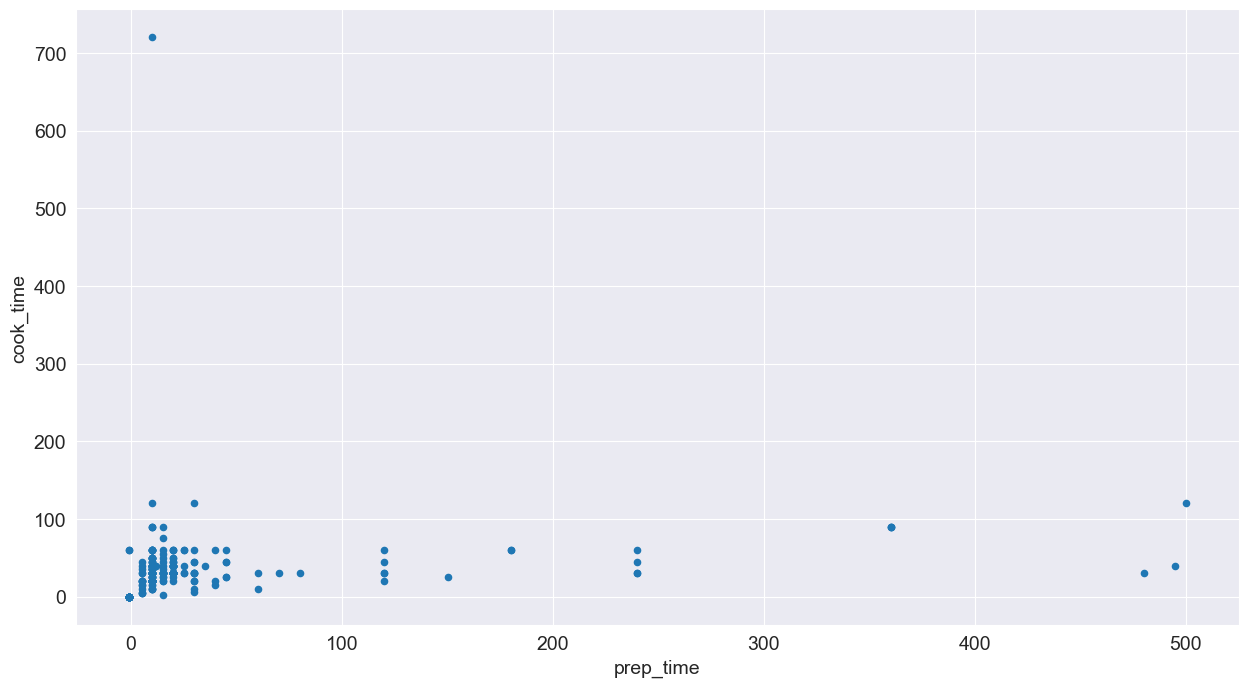

In [23]:
df.plot(kind='scatter',x='prep_time',y='cook_time')
plt.show()

## Sorting Non-Vegetarian Dishes

In [24]:
non_veg_dishes = df.loc[df['diet'] == 'non vegetarian', ['name', 'state', 'cook_time', 'region']]
dish_df = non_veg_dishes.sort_values(by='cook_time', ascending=False)
dish_df

,name,state,cook_time,region
75,Biryani,Telangana,120,South
137,Beef Fry,Kerala,60,South
247,Prawn malai curry,West Bengal,50,East
80,Chicken Tikka masala,Punjab,50,North
81,Chicken Tikka,Punjab,45,North
235,Haq Maas,Assam,40,North East
232,Chingri malai curry,West Bengal,40,East
64,Maach Jhol,Assam,40,North East
211,Vindaloo,Goa,40,West
79,Chicken razala,West Bengal,35,East


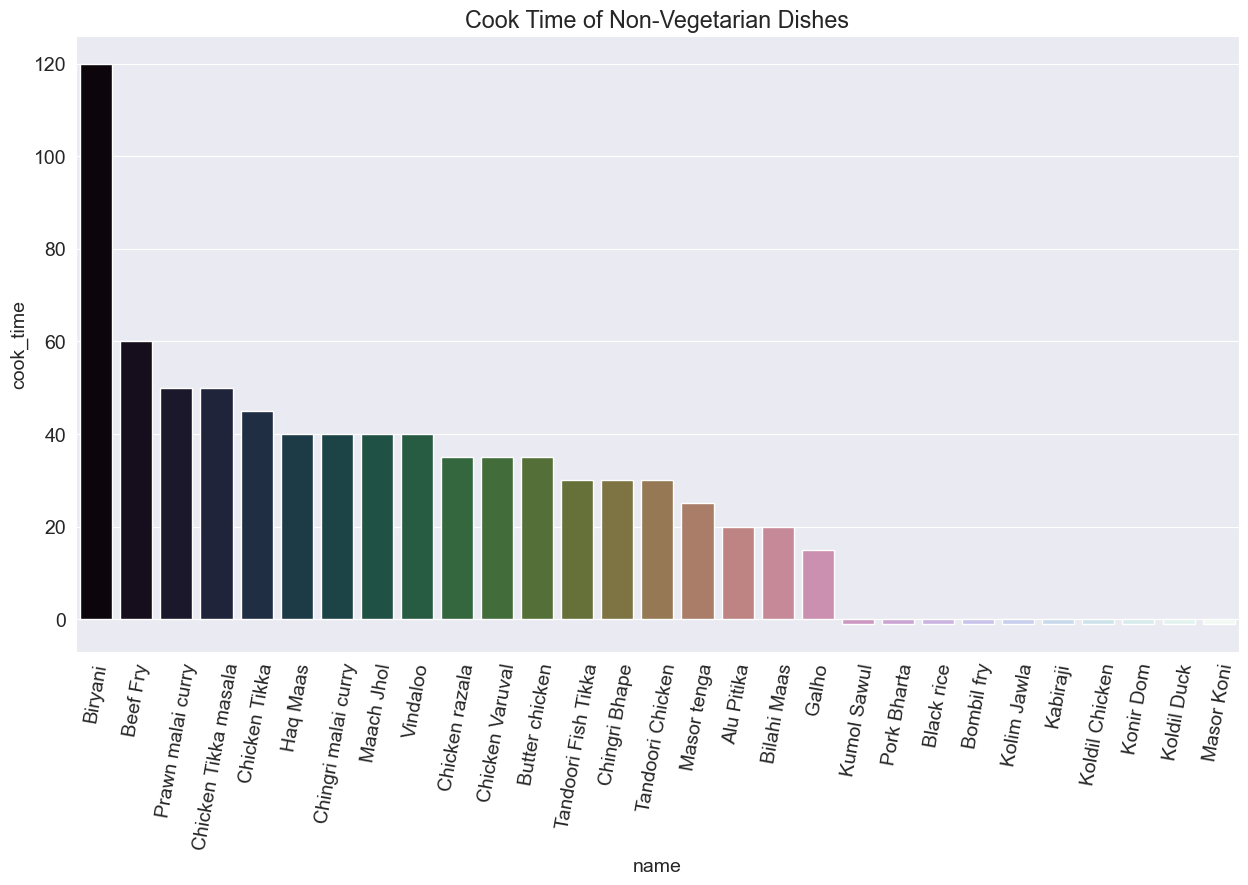

In [34]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 80)
sns.barplot(x='name',y='cook_time',palette='cubehelix',data=dish_df)
plt.title('Cook Time of Non-Vegetarian Dishes')
plt.show()

## Non-Vegetarian Dishes That Are Available In Goa City?

In [45]:
non_veg_dishes_in_goa = df[(df['diet'] != 'vegetarian') & (df['state'] == 'Goa')][['name', 'prep_time', 'cook_time', 'diet']].sort_values(by='prep_time', ascending=False)
non_veg_dishes_in_goa

,name,prep_time,cook_time,diet
211,Vindaloo,10,40,non vegetarian


## Dishes Available in Punjab

In [46]:
dishes_in_punjab = df[(df['state'] == 'Punjab')][['name', 'prep_time', 'cook_time', 'diet']].sort_values(by='prep_time', ascending=False)
dishes_in_punjab

,name,prep_time,cook_time,diet
114,Pindi chana,500,120,vegetarian
123,Tandoori Fish Tikka,240,30,non vegetarian
122,Tandoori Chicken,240,30,non vegetarian
81,Chicken Tikka,120,45,non vegetarian
104,Naan,60,30,vegetarian
101,Misi roti,30,30,vegetarian
100,Makki di roti sarson da saag,25,30,vegetarian
91,Kadai paneer,20,30,vegetarian
119,Shahi paneer,20,40,vegetarian
108,Paneer tikka masala,20,40,vegetarian


## Punjabi Non-Veg Dishes

In [48]:
nonveg_in_punjab = df[(df['state'] == 'Punjab') & (df['diet'] == 'non vegetarian')][['name', 'prep_time', 'cook_time', 'diet']].sort_values(by='prep_time', ascending=False)
nonveg_in_punjab

,name,prep_time,cook_time,diet
122,Tandoori Chicken,240,30,non vegetarian
123,Tandoori Fish Tikka,240,30,non vegetarian
81,Chicken Tikka,120,45,non vegetarian
80,Chicken Tikka masala,10,50,non vegetarian


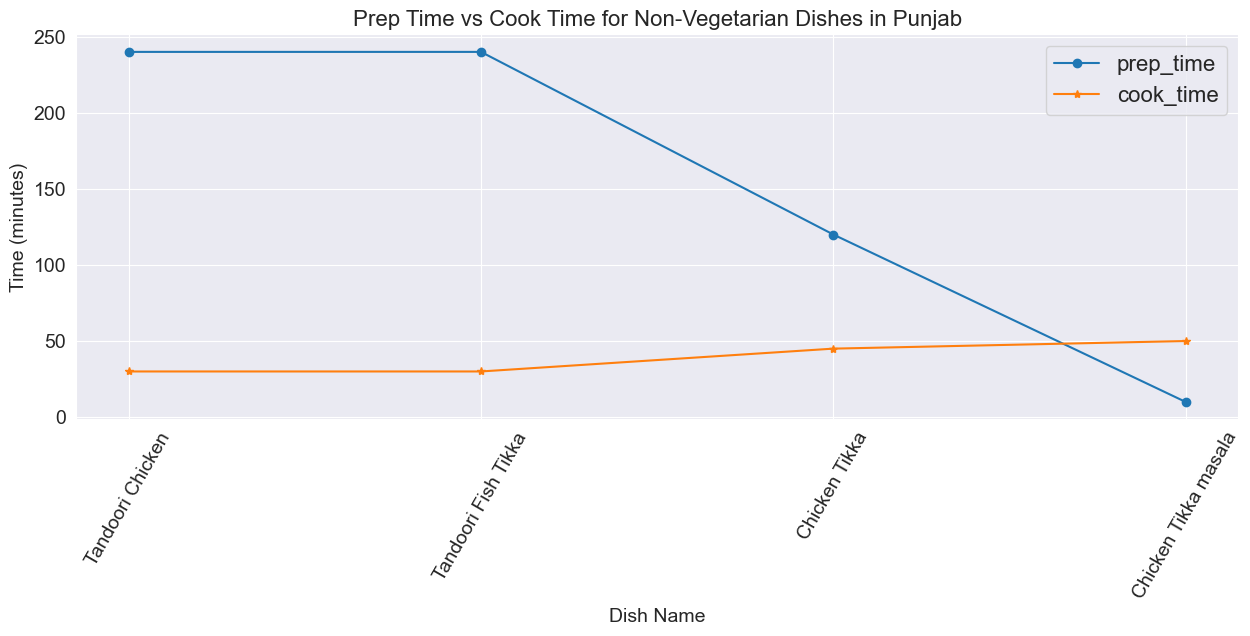

In [52]:
Name = nonveg_in_punjab['name']
time1 = nonveg_in_punjab['prep_time']
time2 = nonveg_in_punjab['cook_time']

plt.figure(figsize=(15, 5))
plt.xticks(rotation=60)
plt.plot(Name, time1, marker='o')
plt.plot(Name, time2, marker='*')
plt.legend(['prep_time', 'cook_time'], fontsize=16)
plt.xlabel('Dish Name', fontsize=14)
plt.ylabel('Time (minutes)', fontsize=14)
plt.title('Prep Time vs Cook Time for Non-Vegetarian Dishes in Punjab', fontsize=16)
plt.show()

# Courses Overview

In [53]:
df.course.value_counts()

course
main course    129
dessert         84
snack           39
starter          2
Name: count, dtype: int64

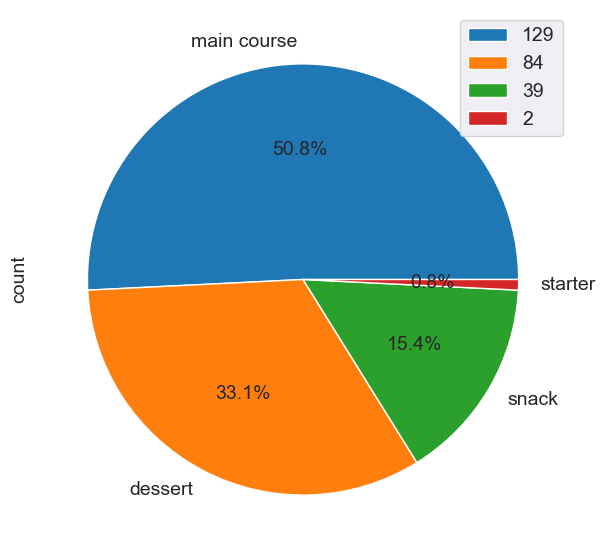

In [56]:
plt.figure(figsize=(15,7))
df['course'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(df['course'].value_counts(),loc='upper right')
plt.show()

In [58]:
courses_df = df[(df['region'] == 'West')][['name', 'region', 'prep_time', 'course']].sort_values(by='prep_time', ascending=False)
courses_df

,name,region,prep_time,course
1,Boondi,West,80,dessert
202,Sabudana Khichadi,West,70,snack
207,Surnoli,West,60,snack
218,Turiya Patra Vatana sabji,West,35,main course
212,Lilva Kachori,West,30,snack
...,...,...,...,...
216,Farsi Puri,West,-1,snack
172,Bombil fry,West,-1,main course
167,Kolim Jawla,West,-1,main course
187,Halvasan,West,-1,dessert


# Best Course In the West Region?

In [59]:
west_course=courses_df.course.value_counts()
west_course

course
main course    28
dessert        23
snack          23
Name: count, dtype: int64

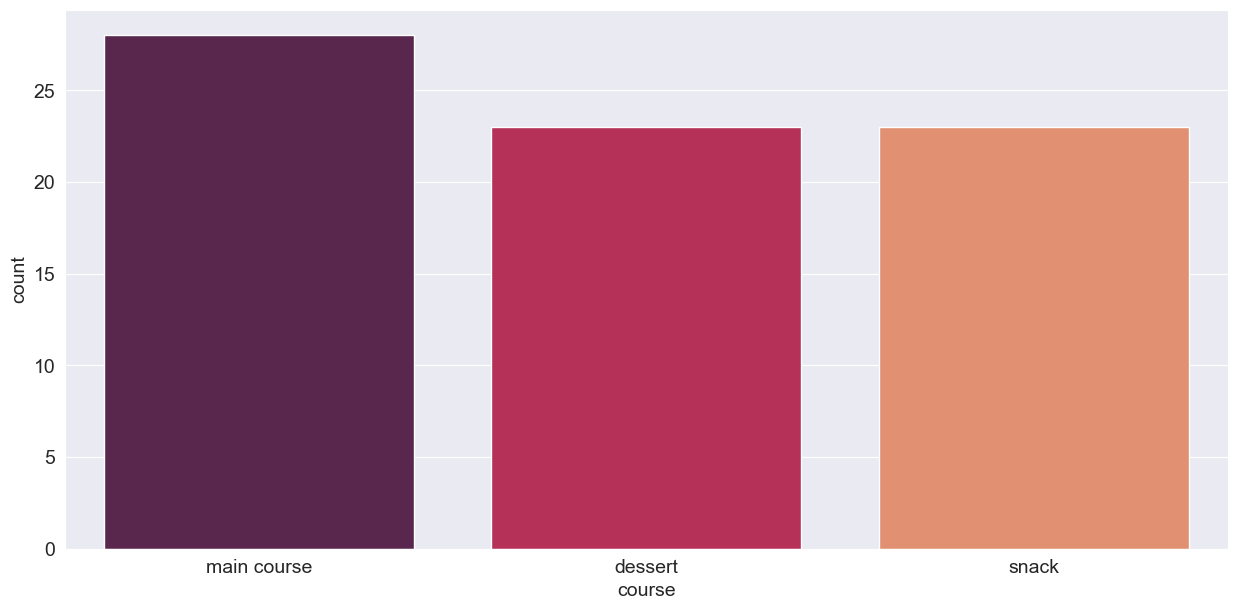

In [61]:
plt.figure(figsize=(15,7))
sns.barplot(x=west_course.index,y=west_course,palette='rocket')
plt.show()

## Analysis Of Cuisines In West Bengal

In [10]:
WB_c = df[(df['state'] == 'West Bengal')][['state','name','course','cook_time','prep_time','ingredients','diet']].sort_values(by='cook_time', ascending=False)
WB_c

,state,name,course,cook_time,prep_time,ingredients,diet
34,West Bengal,Rasgulla,dessert,90,10,"Chhena, sugar, cardamom",vegetarian
33,West Bengal,Ras malai,dessert,60,180,"Chhena, reduced milk, pistachio",vegetarian
23,West Bengal,Cham cham,dessert,60,40,"Flour, cream, sugar, saffron, lemon juice, coc...",vegetarian
233,West Bengal,Goja,dessert,60,20,"Baking soda, clarified butter, oil, all purpos...",vegetarian
5,West Bengal,Imarti,dessert,50,10,"Sugar syrup, lentil flour",vegetarian
247,West Bengal,Prawn malai curry,main course,50,15,"Coconut milk, prawns, garlic, turmeric, sugar",non vegetarian
36,West Bengal,Adhirasam,dessert,50,10,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian
25,West Bengal,Ledikeni,dessert,45,45,"Chhena, sugar, ghee",vegetarian
30,West Bengal,Pantua,dessert,45,45,"Chhena, sugar, ghee, flour",vegetarian
4,West Bengal,Gulab jamun,dessert,40,15,"Milk powder, plain flour, baking powder, ghee,...",vegetarian


In [11]:
WB_c.course.value_counts()

course
dessert        15
main course     9
Name: count, dtype: int64

In [12]:
#Top 5 cuisines according to their average cooking time
new_WB_c = WB_c.head()
new_WB_c

,state,name,course,cook_time,prep_time,ingredients,diet
34,West Bengal,Rasgulla,dessert,90,10,"Chhena, sugar, cardamom",vegetarian
33,West Bengal,Ras malai,dessert,60,180,"Chhena, reduced milk, pistachio",vegetarian
23,West Bengal,Cham cham,dessert,60,40,"Flour, cream, sugar, saffron, lemon juice, coc...",vegetarian
233,West Bengal,Goja,dessert,60,20,"Baking soda, clarified butter, oil, all purpos...",vegetarian
5,West Bengal,Imarti,dessert,50,10,"Sugar syrup, lentil flour",vegetarian


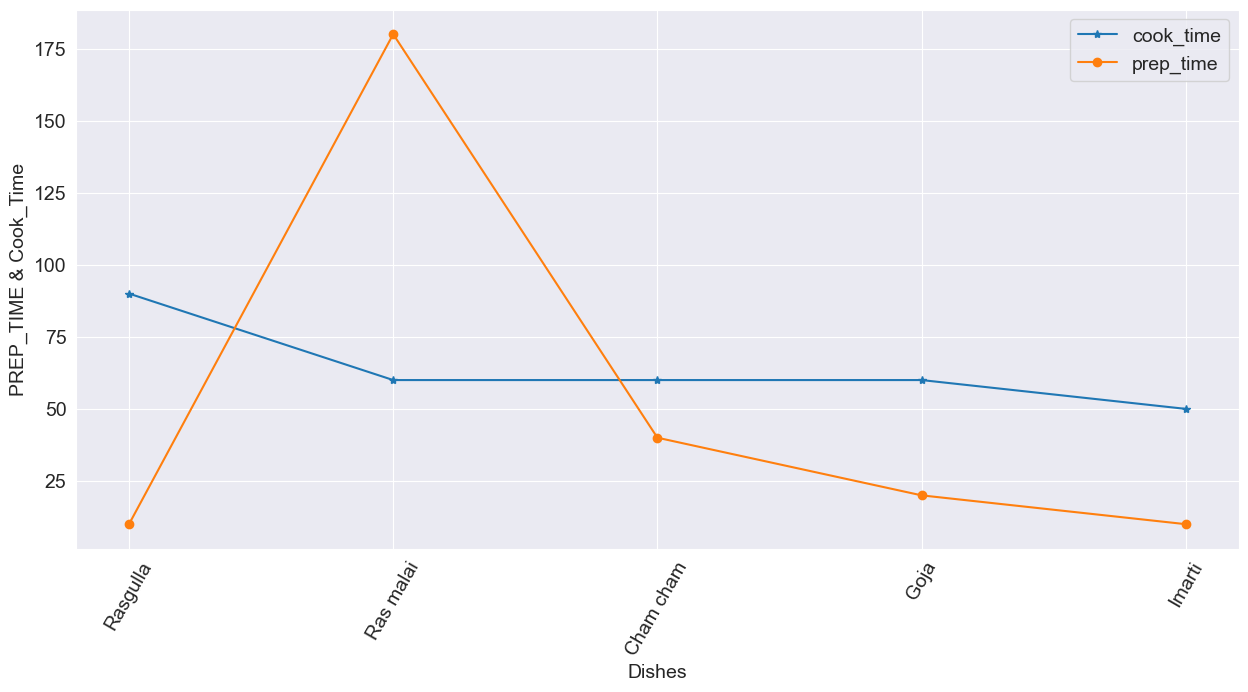

In [14]:
Name1=new_WB_c.name
timeA=new_WB_c.cook_time
timeB=new_WB_c.prep_time

plt.figure(figsize=(15,7))
plt.xticks(rotation=60)
sns.set_style('darkgrid')
plt.plot(Name1,timeA,marker='*')
plt.plot(Name1,timeB,marker='o')
plt.legend(['cook_time','prep_time'])
plt.xlabel('Dishes')
plt.ylabel('PREP_TIME & Cook_Time')

plt.show()

In [15]:
!pip install wordcloud --quiet
from wordcloud import WordCloud

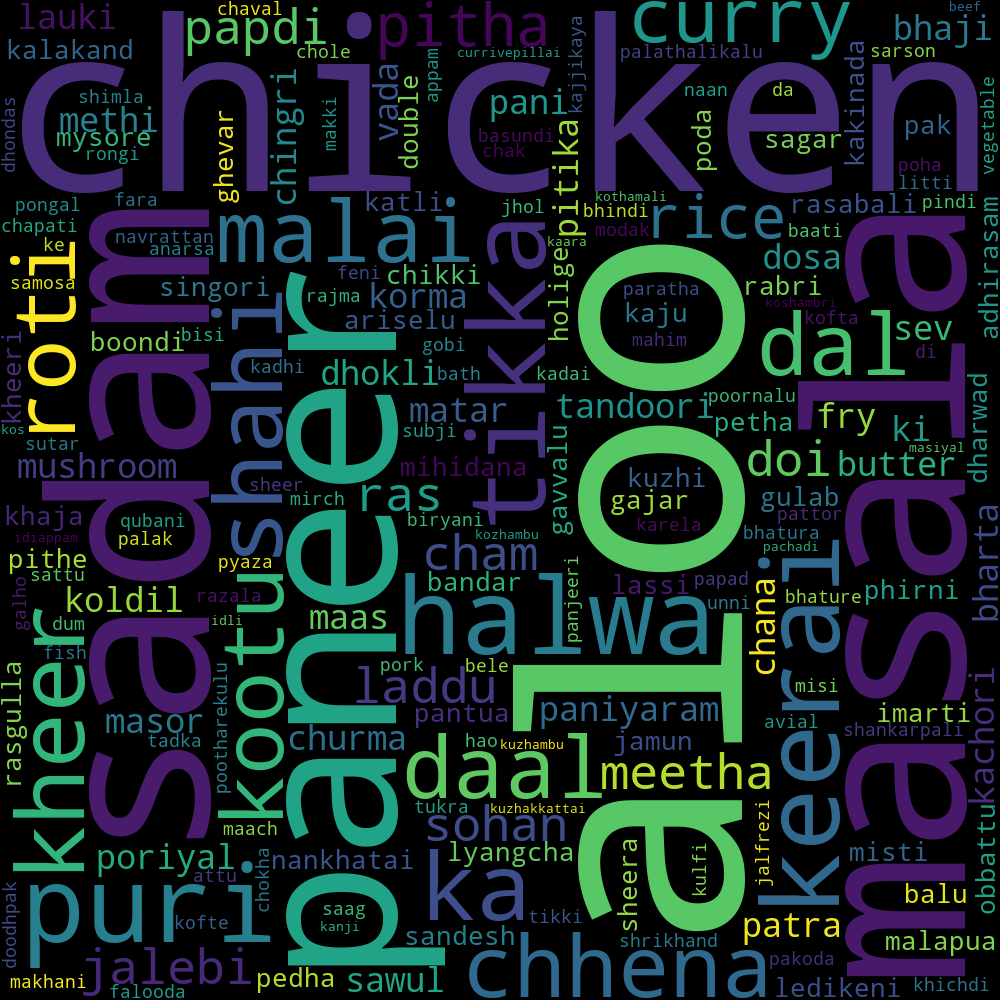

In [16]:
comment_words = ' '
  
for val in df.name.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='black', 
                min_font_size = 10).generate(comment_words) 
wordcloud.to_image()